In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('kc-house-data.csv', sep = ',', encoding = 'latin-1')
df1 = pd.read_csv('laptop_price.csv', sep = ',', encoding = 'latin-1')
df.head()
# df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


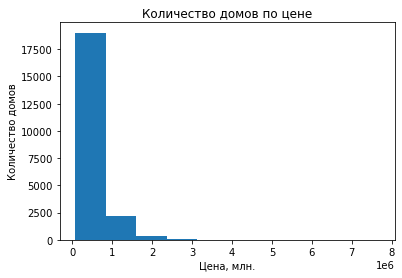

In [2]:
plt.hist(df['price'])
plt.xlabel('Цена, млн.')
plt.ylabel('Количество домов')
plt.title('Количество домов по цене');

Наибольшее количество домов стоят до 1 миллиона. 

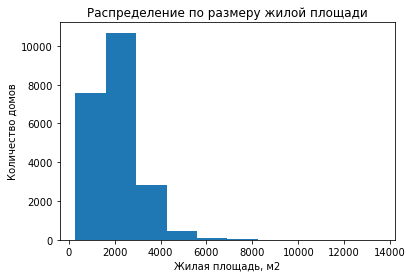

In [3]:
plt.hist(df['sqft_living'])
plt.xlabel('Жилая площадь, м2')
plt.ylabel('Количество домов')
plt.title('Распределение по размеру жилой площади');

Наибольшее число домов с жилой площадью в 2000 м2

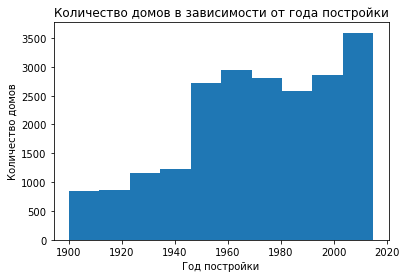

In [4]:
plt.hist(df['yr_built'])
plt.xlabel('Год постройки')
plt.ylabel('Количество домов')
plt.title('Количество домов в зависимости от года постройки');

Наибольшее количество домов былод построено в период 2005-2015гг

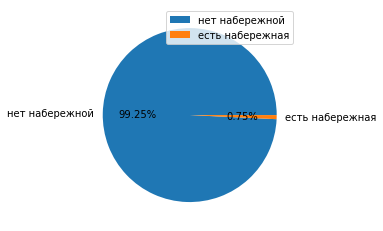

In [5]:
data = df['waterfront'].replace(0, 'нет набережной').reset_index()
data = data['waterfront'].replace(1, 'есть набережная').value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

Менее 1 % домов стоят на набережной

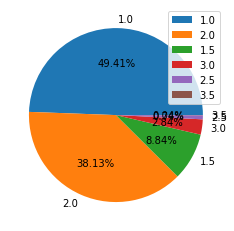

In [6]:
data = df['floors'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

Почти половина домов - одноэтажные. 38% составляют дома в 2 этажа.

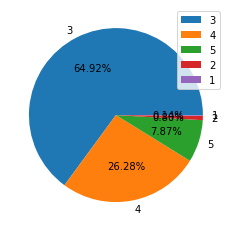

In [7]:
data = df['condition'].value_counts()
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

Почти 65% домов имеют удовлетворительное состояние. 25% - хорошее. И только у 8% домов состояние отличное.

In [8]:
df2 = df[['price', 'sqft_living', 'bathrooms', 'view', 'grade', 'sqft_above']]
import numpy as np
# corr_matrix = np.round(df.corr(), 2)
corr_matrix = np.round(df2.corr(), 2)
corr_matrix

,price,sqft_living,bathrooms,view,grade,sqft_above
price,1.00,0.70,0.53,0.40,0.67,0.61
sqft_living,0.70,1.00,0.75,0.28,0.76,0.88
bathrooms,0.53,0.75,1.00,0.19,0.66,0.69
view,0.40,0.28,0.19,1.00,0.25,0.17
grade,0.67,0.76,0.66,0.25,1.00,0.76
sqft_above,0.61,0.88,0.69,0.17,0.76,1.00


<AxesSubplot:>

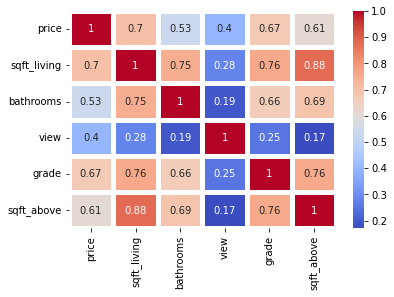

In [9]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, linewidths=5, cmap='coolwarm')

Стоимость дома зависит от таких критериев как, размер жилой площади, количество ванных комнат, надежность конструкций и внешний вид здания.

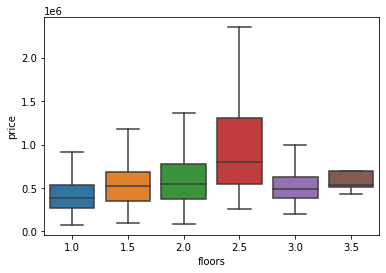

In [10]:
sns.boxplot(y=df['price'], x=df['floors'], showfliers=False);

Дома высотой в 2.5 этажа имеют самую высокую цену

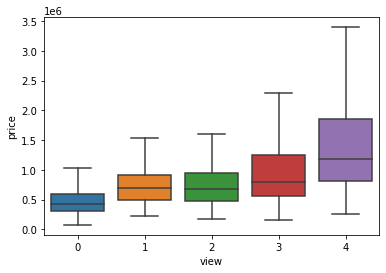

In [11]:
sns.boxplot(y=df['price'], x=df['view'], showfliers=False);

Чем лучше вид у дома, тем он дороже.

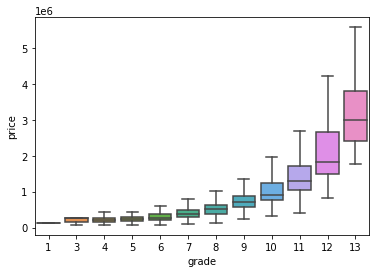

In [12]:
sns.boxplot(y=df['price'], x=df['grade'], showfliers=False);

Дома с высоким качеством конструкций и дизайна стоят заметно дороже остальных домов.

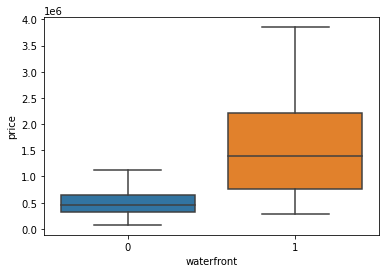

In [13]:
sns.boxplot(y=df['price'], x=df['waterfront'], showfliers=False);

По сравнению с домами, у которых нет набережной, дома на набережной имеют высокую стоимость. Их цена выше в 3 раза и более.

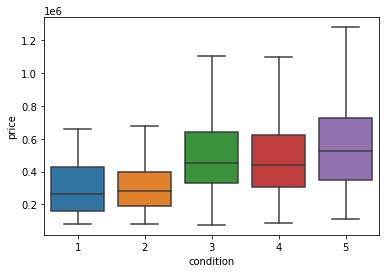

In [14]:
sns.boxplot(y=df['price'], x=df['condition'], showfliers=False);

А вот состояние дома не сильно влияет на стоимость. Дома с оценкой 3, 4 и 5 практически равны по цене.